## Modeling Mood Dynamics with a Markov Chain

In [4]:
import itertools
import random
import numpy as np
import pandas as pd

# Step 1: Define all possible states (3-day mood histories)
moods = ['H', 'S']
states = [''.join(p) for p in itertools.product(moods, repeat=3)]

# Step 2: Define transition probabilities
# We'll generate a random transition matrix as an example
transition_matrix = {}

for state in states:
    # Possible next moods: H or S
    next_states = [state[1:] + 'H', state[1:] + 'S']
    probs = np.random.dirichlet(np.ones(2), size=1)[0]  # Random probabilities that sum to 1
    transition_matrix[state] = dict(zip(next_states, probs))

# ✅ Fix: Use float dtype for DataFrame
df = pd.DataFrame(0.0, index=states, columns=states)

# Fill the transition matrix
for from_state, to_probs in transition_matrix.items():
    for to_state, prob in to_probs.items():
        df.loc[from_state, to_state] = prob

# Show the transition matrix
print("Transition Matrix:")
print(df.round(2))

# Step 3: Simulate the Markov chain
def simulate_markov_chain(start_state, steps=10):
    current_state = start_state
    history = [current_state]

    for _ in range(steps):
        next_state = random.choices(
            population=list(transition_matrix[current_state].keys()),
            weights=list(transition_matrix[current_state].values())
        )[0]
        history.append(next_state)
        current_state = next_state

    return history

# Example simulation
start_state = random.choice(states)
simulation = simulate_markov_chain(start_state, steps=15)

print("\nSimulated Mood States:")
print(" → ".join(simulation))

Transition Matrix:
      HHH   HHS   HSH   HSS   SHH   SHS   SSH   SSS
HHH  0.51  0.49  0.00  0.00  0.00  0.00  0.00  0.00
HHS  0.00  0.00  0.64  0.36  0.00  0.00  0.00  0.00
HSH  0.00  0.00  0.00  0.00  0.62  0.38  0.00  0.00
HSS  0.00  0.00  0.00  0.00  0.00  0.00  0.55  0.45
SHH  0.17  0.83  0.00  0.00  0.00  0.00  0.00  0.00
SHS  0.00  0.00  0.72  0.28  0.00  0.00  0.00  0.00
SSH  0.00  0.00  0.00  0.00  0.99  0.01  0.00  0.00
SSS  0.00  0.00  0.00  0.00  0.00  0.00  0.55  0.45

Simulated Mood States:
SHH → HHS → HSH → SHH → HHS → HSH → SHH → HHS → HSH → SHS → HSS → SSH → SHH → HHH → HHH → HHH


## Graph Visualization

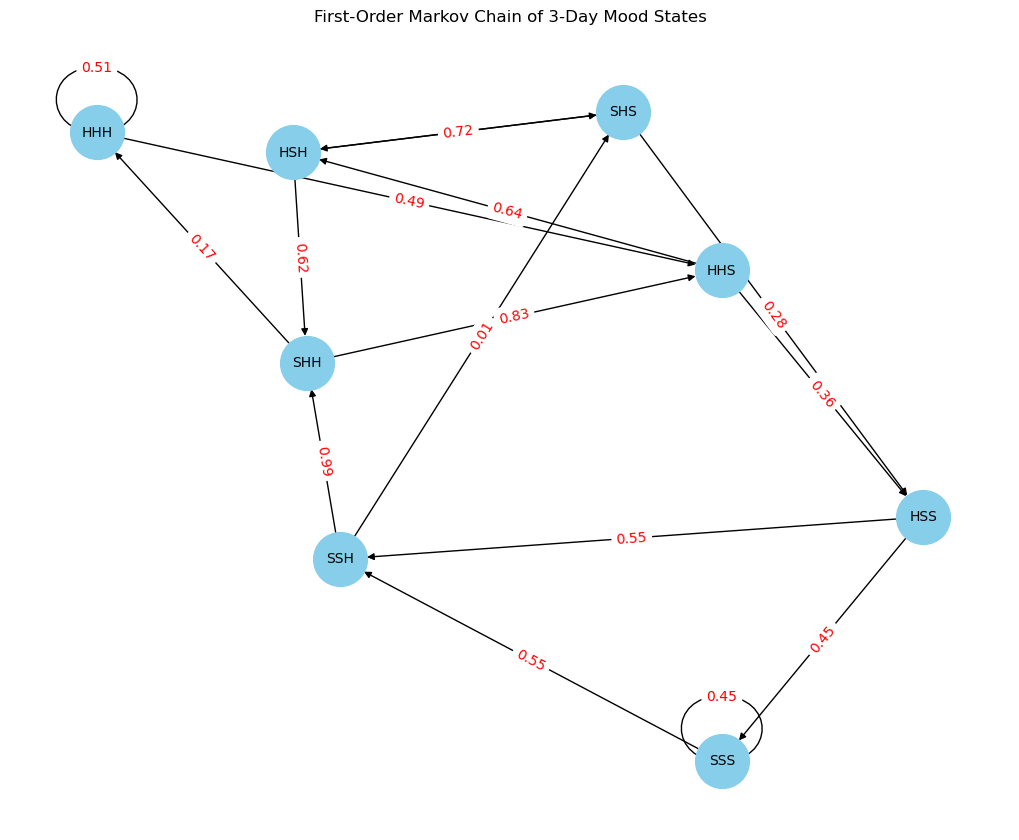

In [6]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add edges from the transition matrix
for from_state, to_probs in transition_matrix.items():
    for to_state, prob in to_probs.items():
        # Only add edge if probability is significant
        if prob > 0.01:
            G.add_edge(from_state, to_state, weight=round(prob, 2))

# Get edge labels
edge_labels = nx.get_edge_attributes(G, 'weight')

# Layout and draw
pos = nx.spring_layout(G, seed=42)  # For consistent layout
plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, node_size=1500, node_color='skyblue', font_size=10, arrows=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

plt.title("First-Order Markov Chain of 3-Day Mood States")
plt.show()